### Loan Default Prediction Using Machine Learning

### Problem Statement

Loan defaults pose a financial risk for lending institutions. The goal of this project is to predict whether a borrower is likely to default on a loan based on financial, credit, and employment-related information. By applying machine learning models to historical loan data, this project aims to support better risk assessment and decision-making.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Loan_default.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

### Dataset Overview

This dataset includes loan application data with financial, credit, and employment-related features. The target variable represents loan default. Since default cases are relatively rare, class imbalance is considered throughout the analysis.

## Exploratory Data Analysis (EDA)

This section focuses on understanding the data distribution and exploring how different features relate to loan default.

In [3]:
df["Age"].describe()

count    255347.000000
mean         43.498306
std          14.990258
min          18.000000
25%          31.000000
50%          43.000000
75%          56.000000
max          69.000000
Name: Age, dtype: float64

In [4]:
bins = [18, 30, 45, 60, 100]
labels = [
    'Young (18–30)',
    'Adult (31–45)',
    'Middle-aged (46–60)',
    'Senior (61+)'
]

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [5]:
df['AgeGroup'].value_counts()

AgeGroup
Adult (31–45)          74067
Middle-aged (46–60)    73501
Young (18–30)          58693
Senior (61+)           44202
Name: count, dtype: int64

In [6]:
df['AgeGroup'].value_counts(normalize=True).round(2) * 100

AgeGroup
Adult (31–45)          30.0
Middle-aged (46–60)    29.0
Young (18–30)          23.0
Senior (61+)           18.0
Name: proportion, dtype: float64

In [7]:
pd.crosstab(df['AgeGroup'], df['Default'], normalize='index').round(2)

Default,0,1
AgeGroup,,
Young (18–30),0.81,0.19
Adult (31–45),0.87,0.13
Middle-aged (46–60),0.92,0.08
Senior (61+),0.95,0.05


<Axes: xlabel='AgeGroup', ylabel='Default'>

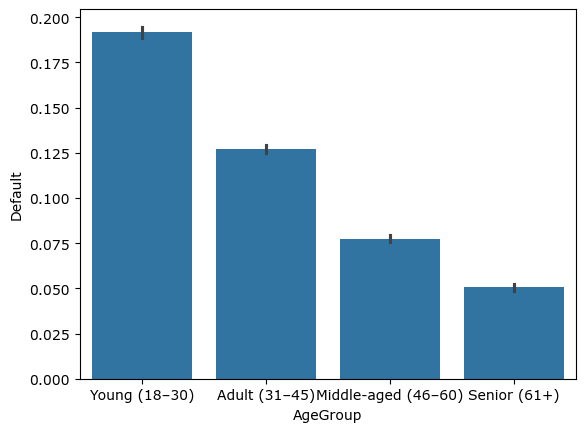

In [8]:
sns.barplot(x='AgeGroup', y='Default', data=df)

### Age Column - Insight

Default rates decrease as age increases.
Younger applicants show the highest default rate, while senior applicants have the lowest risk.

In [9]:
df["Income"].describe()

count    255347.000000
mean      82499.304597
std       38963.013729
min       15000.000000
25%       48825.500000
50%       82466.000000
75%      116219.000000
max      149999.000000
Name: Income, dtype: float64

In [10]:
df[df["Income"] <= 0]

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,AgeGroup


In [11]:
bins = [0, 50000, 100000, df['Income'].max()]
labels = [
    'Low (≤50k)',
    'Medium (50k–100k)',
    'High (>100k)'
]

df['IncomeGroup'] = pd.cut(
    df['Income'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

In [12]:
df['IncomeGroup'].value_counts()

IncomeGroup
Medium (50k–100k)    94683
High (>100k)         94565
Low (≤50k)           66099
Name: count, dtype: int64

In [13]:
df['IncomeGroup'].value_counts(normalize=True).round(2) * 100

IncomeGroup
Medium (50k–100k)    37.0
High (>100k)         37.0
Low (≤50k)           26.0
Name: proportion, dtype: float64

In [14]:
pd.crosstab(
    df['IncomeGroup'],
    df['Default'],
    normalize='index'
).round(2)

Default,0,1
IncomeGroup,,
Low (≤50k),0.83,0.17
Medium (50k–100k),0.90,0.10
High (>100k),0.91,0.09


<Axes: xlabel='IncomeGroup', ylabel='Default'>

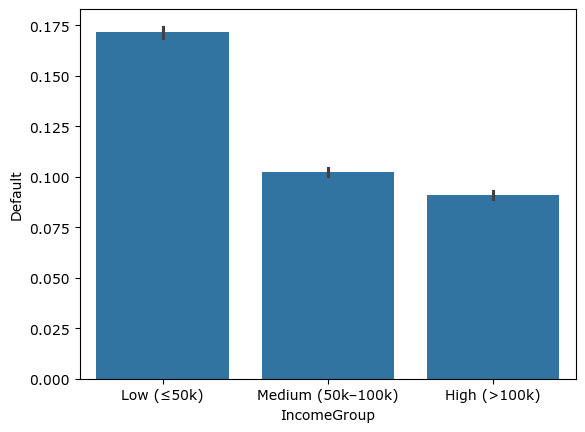

In [15]:
sns.barplot(x='IncomeGroup', y='Default', data=df)

### Income Column - Insight

Default rates decrease as income level increases.
Applicants in the low income group show the highest default risk.

In [16]:
df["LoanAmount"].describe()

count    255347.000000
mean     127578.865512
std       70840.706142
min        5000.000000
25%       66156.000000
50%      127556.000000
75%      188985.000000
max      249999.000000
Name: LoanAmount, dtype: float64

In [17]:
df[df["LoanAmount"] <= 0]

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,AgeGroup,IncomeGroup


In [18]:
bins = [0, 75000, 150000, df['LoanAmount'].max()]
labels = [
    'Low (≤75k)',
    'Medium (75k–150k)',
    'High (>150k)'
]

df['LoanAmountGroup'] = pd.cut(
    df['LoanAmount'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

In [19]:
df['LoanAmountGroup'].value_counts()

LoanAmountGroup
High (>150k)         104400
Medium (75k–150k)     77949
Low (≤75k)            72998
Name: count, dtype: int64

In [20]:
df['LoanAmountGroup'].value_counts(normalize=True).round(2) * 100

LoanAmountGroup
High (>150k)         41.0
Medium (75k–150k)    31.0
Low (≤75k)           29.0
Name: proportion, dtype: float64

In [21]:
pd.crosstab(
    df['LoanAmountGroup'],
    df['Default'],
    normalize='index'
).round(2)

Default,0,1
LoanAmountGroup,,
Low (≤75k),0.92,0.08
Medium (75k–150k),0.89,0.11
High (>150k),0.85,0.15


<Axes: xlabel='LoanAmountGroup', ylabel='Default'>

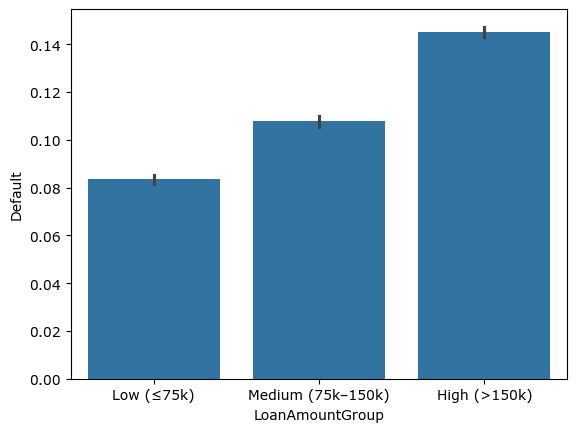

In [22]:
sns.barplot(x='LoanAmountGroup', y='Default', data=df)

### LoanAmount Column - Insight


Loan amount shows a moderate positive relationship with default risk.

In [23]:
df["CreditScore"].describe()

count    255347.000000
mean        574.264346
std         158.903867
min         300.000000
25%         437.000000
50%         574.000000
75%         712.000000
max         849.000000
Name: CreditScore, dtype: float64

In [24]:
bins = [300, 580, 670, 740, df['CreditScore'].max()]
labels = [
    'Poor (300–579)',
    'Fair (580–669)',
    'Good (670–739)',
    'Excellent (740+)'
]

df['CreditScoreGroup'] = pd.cut(
    df['CreditScore'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

In [25]:
df['CreditScoreGroup'].value_counts(normalize=True).round(2) * 100

CreditScoreGroup
Poor (300–579)      51.0
Excellent (740+)    20.0
Fair (580–669)      16.0
Good (670–739)      13.0
Name: proportion, dtype: float64

In [26]:
pd.crosstab(
    df['CreditScoreGroup'],
    df['Default'],
    normalize='index'
).round(2)

Default,0,1
CreditScoreGroup,,
Poor (300–579),0.88,0.12
Fair (580–669),0.89,0.11
Good (670–739),0.89,0.11
Excellent (740+),0.90,0.10


<Axes: xlabel='CreditScoreGroup', ylabel='Default'>

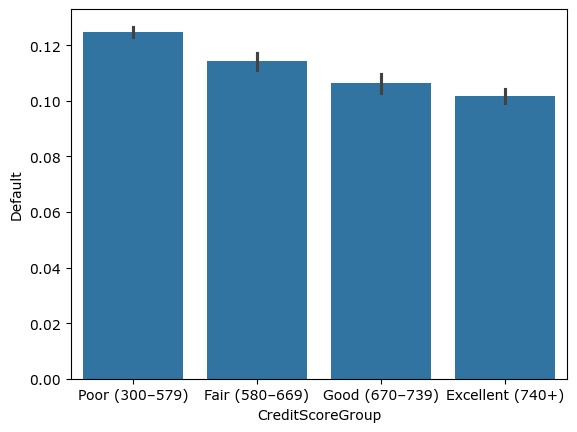

In [27]:
sns.barplot(x='CreditScoreGroup', y='Default', data=df)

### CreditScore Column – Insight


Credit score shows a slight inverse relationship with default risk.


In [28]:
df['MonthsEmployed'].describe()

count    255347.000000
mean         59.541976
std          34.643376
min           0.000000
25%          30.000000
50%          60.000000
75%          90.000000
max         119.000000
Name: MonthsEmployed, dtype: float64

In [29]:
bins = [0, 12, 36, 72, df['MonthsEmployed'].max()]
labels = [
    'Very short (≤1 year)',
    'Short (1–3 years)',
    'Medium (3–6 years)',
    'Long (>6 years)'
]

df['EmploymentLengthGroup'] = pd.cut(
    df['MonthsEmployed'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

In [30]:
df['EmploymentLengthGroup'].value_counts(normalize=True).round(2) * 100

EmploymentLengthGroup
Long (>6 years)         39.0
Medium (3–6 years)      30.0
Short (1–3 years)       20.0
Very short (≤1 year)    11.0
Name: proportion, dtype: float64

In [31]:
pd.crosstab(
    df['EmploymentLengthGroup'],
    df['Default'],
    normalize='index'
).round(2)

Default,0,1
EmploymentLengthGroup,,
Very short (≤1 year),0.83,0.17
Short (1–3 years),0.85,0.15
Medium (3–6 years),0.88,0.12
Long (>6 years),0.92,0.08


<Axes: xlabel='EmploymentLengthGroup', ylabel='Default'>

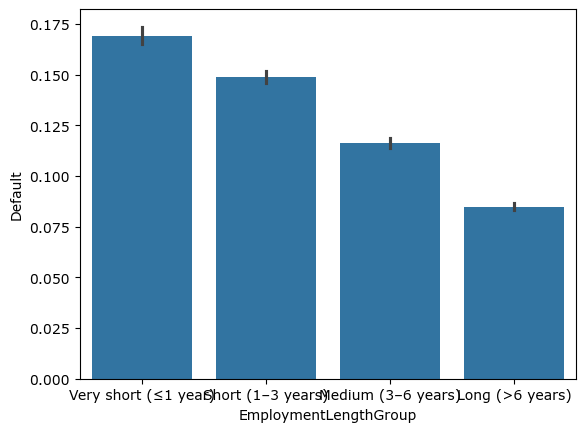

In [32]:
sns.barplot(
    x='EmploymentLengthGroup',
    y='Default',
    data=df
)

### MonthsEmployed - Insight


Default risk declines with longer employment duration.

In [33]:
df['NumCreditLines'].describe()

count    255347.000000
mean          2.501036
std           1.117018
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: NumCreditLines, dtype: float64

In [34]:
pd.crosstab(
    df['NumCreditLines'],
    df['Default'],
    normalize='index'
).round(2)

Default,0,1
NumCreditLines,,
1,0.89,0.11
2,0.89,0.11
3,0.88,0.12
4,0.87,0.13


<Axes: xlabel='NumCreditLines', ylabel='Default'>

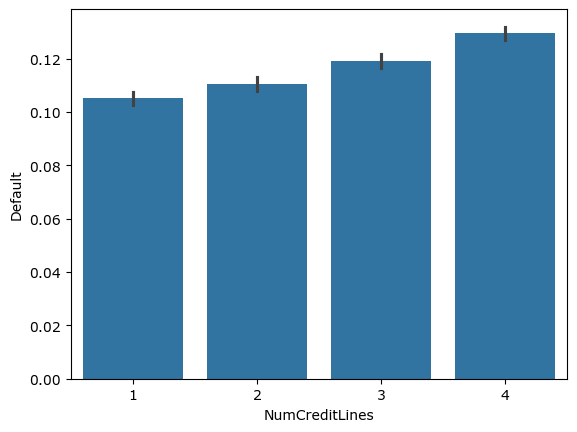

In [35]:
sns.barplot(
    x='NumCreditLines',
    y='Default',
    data=df
)

### NumCreditLines - Insight


NumCreditLines shows a weak positive relationship with default risk.

In [36]:
df['InterestRate'].describe()

count    255347.000000
mean         13.492773
std           6.636443
min           2.000000
25%           7.770000
50%          13.460000
75%          19.250000
max          25.000000
Name: InterestRate, dtype: float64

In [37]:
bins = [0, 8, 15, 22, 30]
labels = ['Low (<8%)', 'Medium (8–15%)', 'High (15–22%)', 'Very High (>22%)']

df['InterestRateGroup'] = pd.cut(df['InterestRate'], bins=bins, labels=labels)

In [38]:
df['InterestRateGroup'].value_counts()

InterestRateGroup
Medium (8–15%)      78396
High (15–22%)       77125
Low (<8%)           66489
Very High (>22%)    33337
Name: count, dtype: int64

In [39]:
df['InterestRateGroup'].value_counts(normalize=True).round(2)*100

InterestRateGroup
Medium (8–15%)      31.0
High (15–22%)       30.0
Low (<8%)           26.0
Very High (>22%)    13.0
Name: proportion, dtype: float64

In [40]:
pd.crosstab(
    df['InterestRateGroup'],
    df['Default'],
    normalize='index'
).round(2)

Default,0,1
InterestRateGroup,,
Low (<8%),0.93,0.07
Medium (8–15%),0.90,0.10
High (15–22%),0.85,0.15
Very High (>22%),0.81,0.19


<Axes: xlabel='InterestRateGroup', ylabel='Default'>

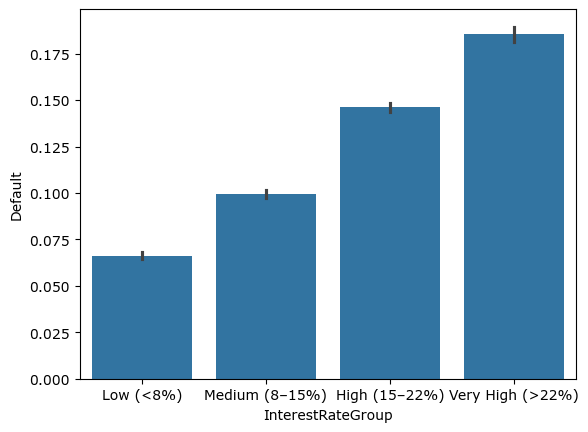

In [41]:
sns.barplot(
    x='InterestRateGroup',
    y='Default',
    data=df
)

### InterestRate - Insight


Higher interest rates are associated with higher default risk.

In [42]:
df['LoanTerm'].describe()

count    255347.000000
mean         36.025894
std          16.969330
min          12.000000
25%          24.000000
50%          36.000000
75%          48.000000
max          60.000000
Name: LoanTerm, dtype: float64

In [43]:
bins = [0, 24, 36, 48, 72]
labels = ['Short (≤24 months)', 'Medium (25–36 months)', 
          'Long (37–48 months)', 'Very Long (>48 months)']

df['LoanTermGroup'] = pd.cut(df['LoanTerm'], bins=bins, labels=labels)

In [44]:
df['LoanTermGroup'].value_counts()

LoanTermGroup
Short (≤24 months)        101966
Long (37–48 months)        51166
Very Long (>48 months)     51154
Medium (25–36 months)      51061
Name: count, dtype: int64

In [45]:
df['LoanTermGroup'].value_counts(normalize=True).round(2) * 100

LoanTermGroup
Short (≤24 months)        40.0
Long (37–48 months)       20.0
Very Long (>48 months)    20.0
Medium (25–36 months)     20.0
Name: proportion, dtype: float64

In [46]:
pd.crosstab(
    df['LoanTermGroup'],
    df['Default'],
    normalize='index'
).round(2)

Default,0,1
LoanTermGroup,,
Short (≤24 months),0.88,0.12
Medium (25–36 months),0.88,0.12
Long (37–48 months),0.88,0.12
Very Long (>48 months),0.88,0.12


<Axes: xlabel='LoanTermGroup', ylabel='Default'>

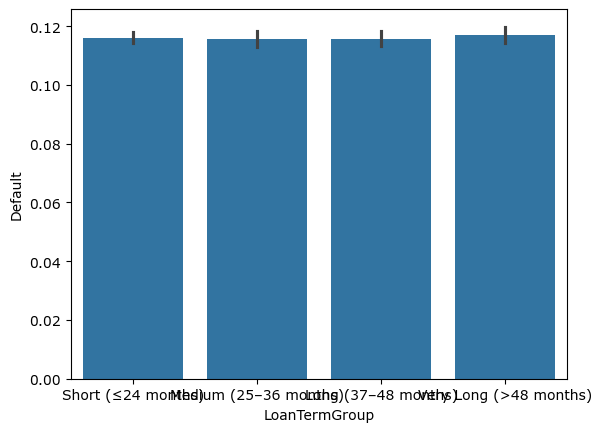

In [47]:
sns.barplot(
    x='LoanTermGroup',
    y='Default',
    data=df
)

### LoanTerm - Insight


Loan term does not show a clear relationship with default risk.

In [48]:
df['DTIRatio'].describe()

count    255347.000000
mean          0.500212
std           0.230917
min           0.100000
25%           0.300000
50%           0.500000
75%           0.700000
max           0.900000
Name: DTIRatio, dtype: float64

In [49]:
bins = [0, 0.3, 0.5, 0.7, 1.0]
labels = ['Low (<30%)', 'Medium (30–50%)', 'High (50–70%)', 'Very High (>70%)']

df['DTIGroup'] = pd.cut(df['DTIRatio'], bins=bins, labels=labels)

In [50]:
df['DTIGroup'].value_counts(normalize=True).round(2) * 100

DTIGroup
Low (<30%)          26.0
Medium (30–50%)     25.0
High (50–70%)       25.0
Very High (>70%)    24.0
Name: proportion, dtype: float64

Most borrowers fall into the medium to high DTI ranges.

In [51]:
pd.crosstab(
    df['DTIGroup'],
    df['Default'],
    normalize='index'
).round(2)

Default,0,1
DTIGroup,,
Low (<30%),0.89,0.11
Medium (30–50%),0.88,0.12
High (50–70%),0.88,0.12
Very High (>70%),0.88,0.12


<Axes: xlabel='DTIGroup', ylabel='Default'>

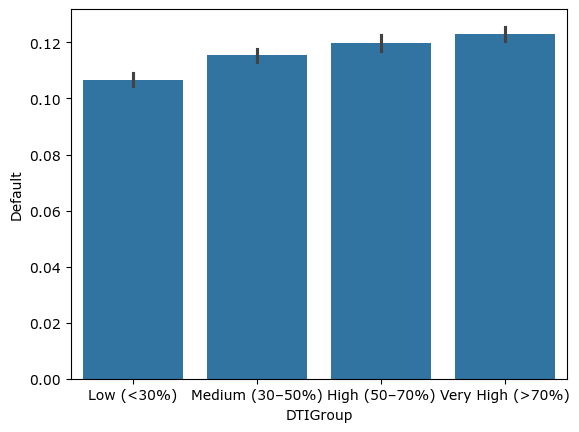

In [52]:
sns.barplot(
    x='DTIGroup',
    y='Default',
    data=df
)

### DTI Ratio - Insight


Borrowers with higher DTI ratios tend to default slightly more often.

In [53]:
df['Education'].value_counts()

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

In [54]:
df['Education'].value_counts(normalize=True).round(2) * 100

Education
Bachelor's     25.0
High School    25.0
Master's       25.0
PhD            25.0
Name: proportion, dtype: float64

<Axes: xlabel='Education', ylabel='Default'>

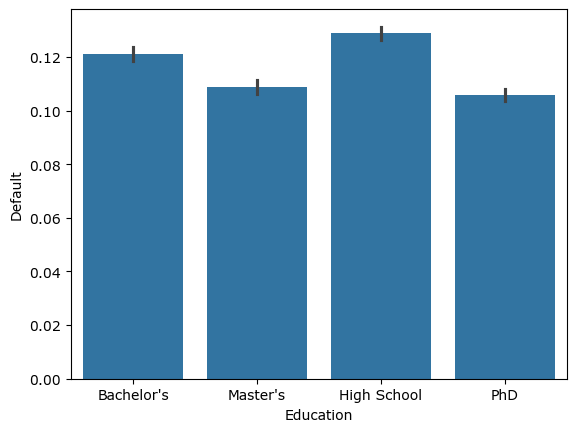

In [55]:
sns.barplot(x='Education', y='Default', data=df)

### Education – Insight


Higher education levels are associated with slightly lower default risk.
(Education alone does not strongly differentiate default risk, but it may add value when combined with other financial features.)

In [56]:
df['EmploymentType'].value_counts()

EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

In [57]:
df['EmploymentType'].value_counts(normalize= True).round(2)*100

EmploymentType
Part-time        25.0
Unemployed       25.0
Self-employed    25.0
Full-time        25.0
Name: proportion, dtype: float64

In [58]:
pd.crosstab(
    df['EmploymentType'],
    df['Default'],
    normalize='index'
).round(2)

Default,0,1
EmploymentType,,
Full-time,0.91,0.09
Part-time,0.88,0.12
Self-employed,0.89,0.11
Unemployed,0.86,0.14


<Axes: xlabel='EmploymentType', ylabel='Default'>

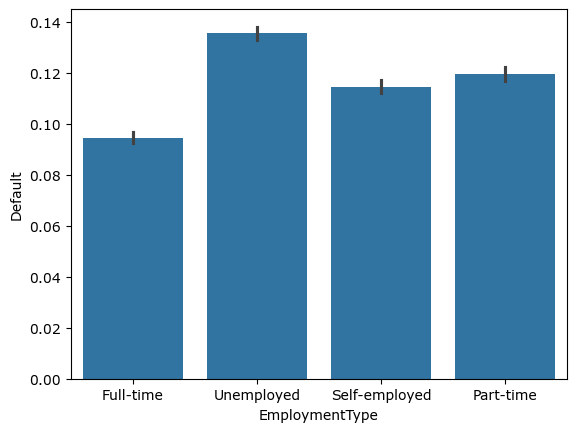

In [59]:
sns.barplot(x='EmploymentType', y='Default', data=df)

<Axes: xlabel='EmploymentType', ylabel='Default'>

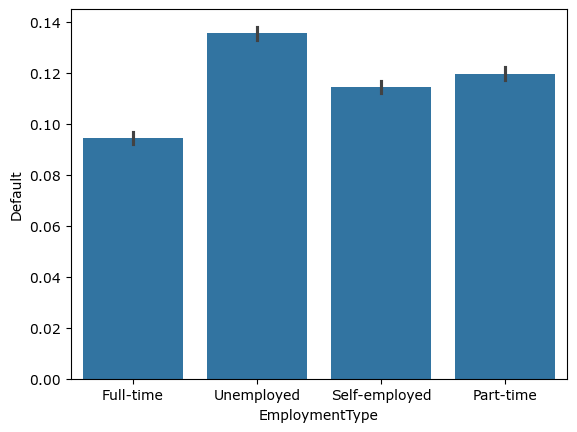

In [60]:
sns.barplot(x='EmploymentType', y='Default', data=df)

### EmploymentType – Insight


Borrowers with stable employment, especially full-time jobs, tend to default less, while unemployed applicants show a noticeably higher risk.

In [61]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

In [62]:
df['MaritalStatus'].value_counts(normalize=True).round(2)*100

MaritalStatus
Married     33.0
Divorced    33.0
Single      33.0
Name: proportion, dtype: float64

In [63]:
pd.crosstab(
    df['MaritalStatus'],
    df['Default'],
    normalize='index'
).round(2)

Default,0,1
MaritalStatus,,
Divorced,0.87,0.13
Married,0.90,0.10
Single,0.88,0.12


<Axes: xlabel='MaritalStatus', ylabel='Default'>

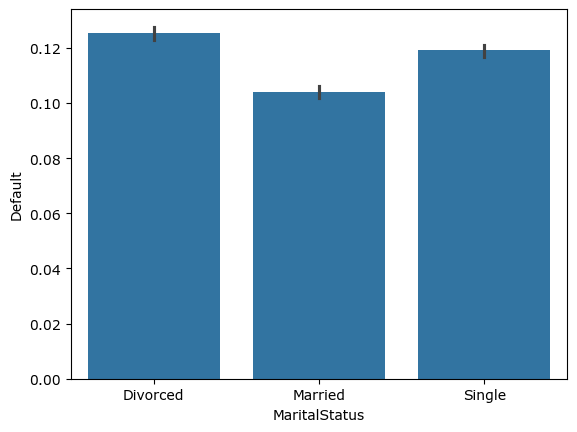

In [64]:
sns.barplot(x='MaritalStatus', y='Default', data=df)

### MaritalStatus – Insight


Married applicants appear to be slightly less likely to default compared to single or divorced borrowers, although the differences are relatively small.

In [65]:
df['HasMortgage'].value_counts()

HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

In [66]:
df['HasMortgage'].value_counts()

HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

In [67]:
df['HasMortgage'].value_counts(normalize=True).round(2)*100

HasMortgage
Yes    50.0
No     50.0
Name: proportion, dtype: float64

<Axes: xlabel='HasMortgage', ylabel='Default'>

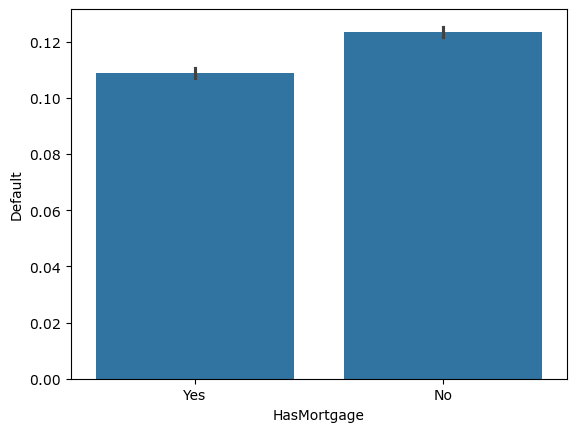

In [68]:
sns.barplot(x='HasMortgage', y='Default', data=df)

### HasMortgage – Insight


Applicants with an existing mortgage tend to default slightly less than those without one, but the gap is relatively small.

In [69]:
df['HasDependents'].value_counts()

HasDependents
Yes    127742
No     127605
Name: count, dtype: int64

In [70]:
df['HasDependents'].value_counts(normalize=True).round(2)*100

HasDependents
Yes    50.0
No     50.0
Name: proportion, dtype: float64

<Axes: xlabel='HasDependents', ylabel='Default'>

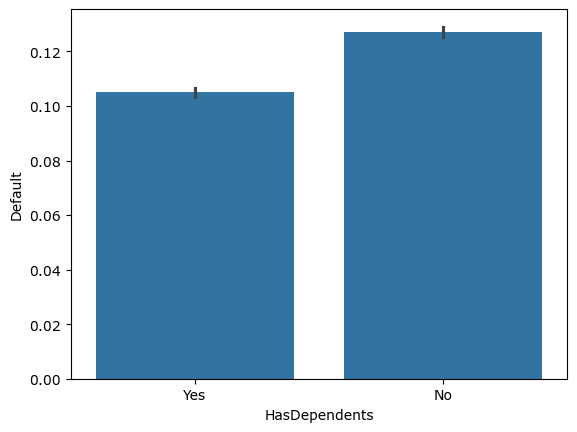

In [71]:
sns.barplot(x='HasDependents', y='Default', data=df)

### HasDependents – Insight


Applicants with dependents tend to default slightly less, although the difference between the two groups is relatively small

In [72]:
df['LoanPurpose'].value_counts()

LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64

In [73]:
df['LoanPurpose'].value_counts(normalize=True).round(2)*100

LoanPurpose
Business     20.0
Home         20.0
Education    20.0
Other        20.0
Auto         20.0
Name: proportion, dtype: float64

<Axes: xlabel='LoanPurpose', ylabel='Default'>

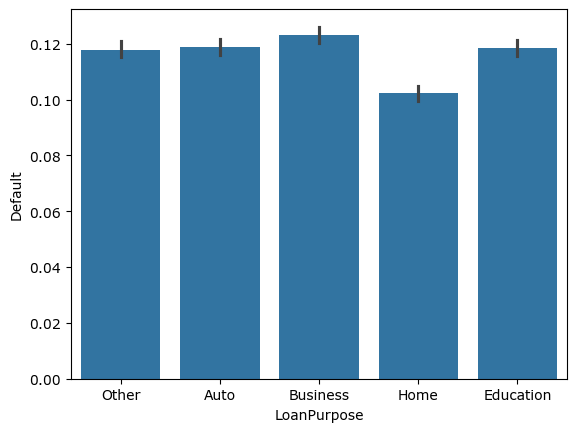

In [74]:
sns.barplot(x='LoanPurpose', y='Default', data=df)

### LoanPurpose – Insight


Loan purpose shows minor variation in default risk, with business loans being slightly riskier.

In [75]:
df['HasCoSigner'].value_counts()

HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64

In [76]:
df['HasCoSigner'].value_counts(normalize=True).round(2)*100

HasCoSigner
Yes    50.0
No     50.0
Name: proportion, dtype: float64

<Axes: xlabel='HasCoSigner', ylabel='Default'>

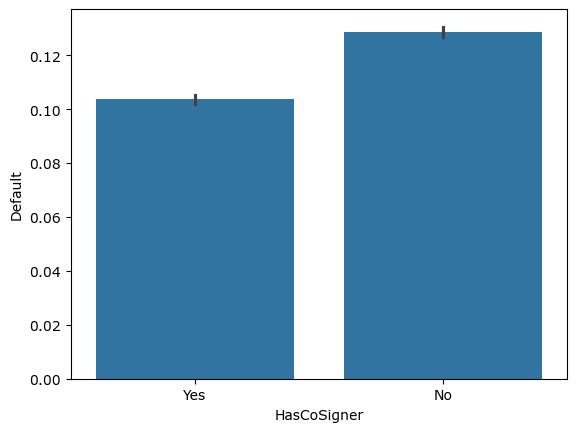

In [77]:
sns.barplot(x='HasCoSigner', y='Default', data=df)

### HasCoSigner – Insight



Borrowers with a co-signer tend to have a slightly lower default rate. While the difference is not dramatic, the presence of a co-signer seems to reduce risk to some extent.

In [78]:
df['Default'].value_counts(normalize=True).round(2) * 100

Default
0    88.0
1    12.0
Name: proportion, dtype: float64

<Axes: xlabel='Default', ylabel='count'>

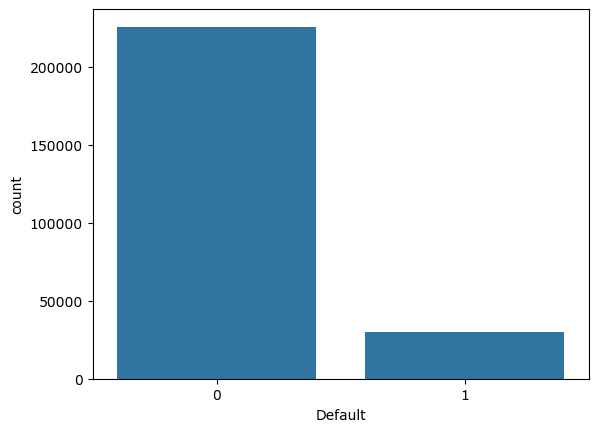

In [79]:
sns.countplot(x='Default', data=df)

### Default – Insight


The majority of borrowers did not default, with default cases representing a much smaller share of the dataset. This imbalance may affect model performance if not handled properly.

<Axes: xlabel='InterestRateGroup', ylabel='Default'>

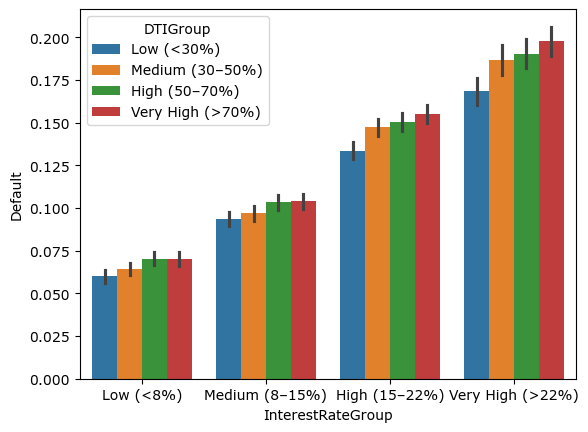

In [80]:
sns.barplot(
    x='InterestRateGroup',
    y='Default',
    hue='DTIGroup',
    data=df
)

<Axes: xlabel='EmploymentType', ylabel='Default'>

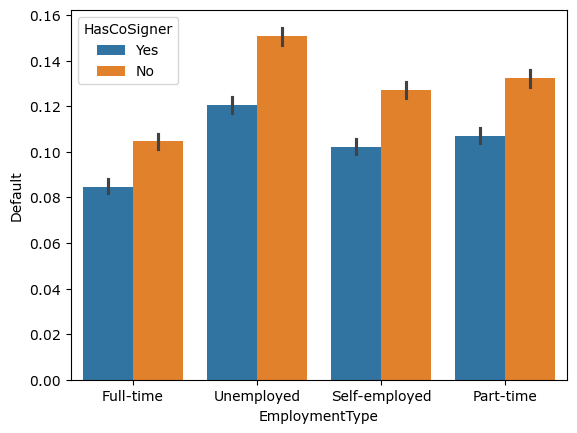

In [81]:
sns.barplot(
    x='EmploymentType',
    y='Default',
    hue='HasCoSigner',
    data=df
)

<Axes: xlabel='IncomeGroup', ylabel='Default'>

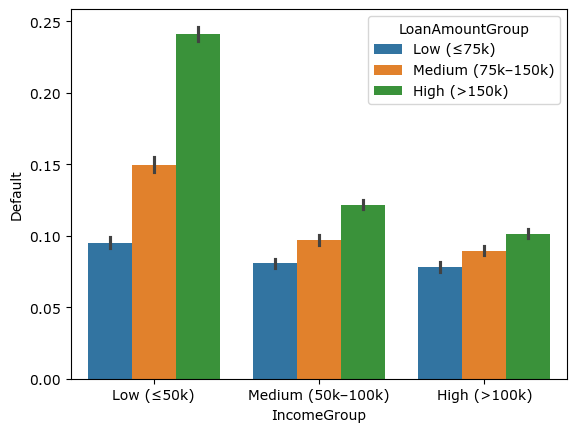

In [82]:
sns.barplot(
    x='IncomeGroup',
    y='Default',
    hue='LoanAmountGroup',
    data=df
)

### Overall Insight


While individual features show limited impact when analyzed separately, combining financial and demographic factors reveals clearer risk patterns.
Higher interest rates combined with high DTI significantly increase default risk, indicating strong financial stress.
Employment stability and the presence of a co-signer consistently reduce default likelihood across most job categories.
Finally, the relationship between income and loan amount highlights that larger loans become riskier mainly for lower-income borrowers, rather than being risky on their own.

### Feature Selection Rationale


Based on the exploratory analysis, features showing a clear and consistent relationship with default risk were prioritized for modeling.

Interest rate emerged as the strongest individual predictor, while income and loan amount demonstrated meaningful interaction effects. Employment stability and the presence of a co-signer also showed noticeable differences in default behavior.

Features with weak or inconsistent patterns, such as loan term and marital status, were considered lower priority.

In [83]:
features = [
    'InterestRate',
    'DTIRatio',
    'Income',
    'LoanAmount',
    'MonthsEmployed',
    'CreditScore',
    'EmploymentType',
    'HasCoSigner',
    'HasMortgage',
    'HasDependents'
]

### Data Preparation


In this step, the data was prepared for modeling. Relevant features were selected based on EDA findings, categorical variables were encoded using one-hot encoding, and numerical features were scaled where required. 

The dataset was then split into training and test sets using stratification to preserve the class distribution of the target variable.

In [84]:
X = df[features]
y = df['Default']

In [85]:
cat_cols = [
    'EmploymentType',
    'HasCoSigner',
    'HasMortgage',
    'HasDependents'
]

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [87]:
X = df.drop("Default", axis=1)
y = df["Default"]

cat_cols = [
    'Education',
    'EmploymentType',
    'HasCoSigner',
    'HasMortgage',
    'HasDependents'
]

num_cols = [
    'InterestRate',
    'DTIRatio',
    'Income',
    'LoanAmount',
    'MonthsEmployed',
    'CreditScore'
]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
    ]
)

In [88]:
class_weight = 'balanced'

Prior to modeling, relevant numerical and categorical features were selected based on EDA findings. Categorical variables were encoded using one-hot encoding, and numerical features were scaled where required. The dataset was split into training and test sets using stratification to preserve the class distribution of the target variable.

### Baseline Model: Logistic Regression
A logistic regression model was trained as a baseline to establish a performance benchmark for more complex models.

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [90]:
logreg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        random_state=42
    ))
])

logreg_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [91]:
y_pred = logreg_pipeline.predict(X_test)
y_proba = logreg_pipeline.predict_proba(X_test)[:, 1]

In [92]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.64      0.76     45139
           1       0.19      0.66      0.30      5931

    accuracy                           0.64     51070
   macro avg       0.56      0.65      0.53     51070
weighted avg       0.85      0.64      0.70     51070



In [93]:
confusion_matrix(y_test, y_pred)

array([[28688, 16451],
       [ 2041,  3890]])

In [94]:
roc_auc_score(y_test, y_proba)

0.7003227621797119

### Insight


As a baseline, a Logistic Regression model was trained to predict loan default.
The model provides a reasonable separation between default and non-default borrowers, with better performance on the majority class and acceptable recall on the minority (default) class.
This baseline serves as a reference point for more complex models in later stages.

### Random Forest Classifier
Random Forest was used to capture non-linear relationships and feature interactions.

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced",
        n_jobs=-1
    ))
])

rf_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [96]:
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

In [97]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.58      0.01      0.03      5931

    accuracy                           0.88     51070
   macro avg       0.73      0.51      0.48     51070
weighted avg       0.85      0.88      0.83     51070

Confusion Matrix:
 [[45084    55]
 [ 5854    77]]
ROC-AUC: 0.6814945792742282


In [98]:
from sklearn.metrics import precision_score, recall_score, f1_score

rows = []

for t in [0.1, 0.2, 0.3]:
    y_pred_t = (y_proba_rf >= t).astype(int)
    rows.append({
        "Threshold": t,
        "Precision": precision_score(y_test, y_pred_t),
        "Recall": recall_score(y_test, y_pred_t),
        "F1": f1_score(y_test, y_pred_t)
    })

pd.DataFrame(rows)

,Threshold,Precision,Recall,F1
0,0.1,0.170478,0.705109,0.274572
1,0.2,0.269560,0.302647,0.285147
2,0.3,0.401319,0.123082,0.188387


In [99]:
import pandas as pd

model = rf_pipeline.named_steps["model"]
feature_names = rf_pipeline.named_steps["preprocessor"].get_feature_names_out()

importances = model.feature_importances_

feature_importance = pd.Series(
    importances,
    index=feature_names
).sort_values(ascending=False)

feature_importance.head(15)

num__InterestRate                    0.174245
num__Income                          0.165484
num__LoanAmount                      0.152988
num__MonthsEmployed                  0.137147
num__CreditScore                     0.134266
num__DTIRatio                        0.120057
cat__HasMortgage_Yes                 0.016513
cat__EmploymentType_Self-employed    0.012995
cat__HasDependents_Yes               0.012889
cat__Education_Master's              0.012830
cat__EmploymentType_Part-time        0.012813
cat__HasCoSigner_Yes                 0.012354
cat__Education_PhD                   0.012346
cat__Education_High School           0.012242
cat__EmploymentType_Unemployed       0.010829
dtype: float64

### Gradient Boosting Classifier
Gradient Boosting was applied to improve predictive performance by sequentially correcting previous errors.

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier

gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

gb_pipeline.fit(X_train, y_train)

y_pred_gb = gb_pipeline.predict(X_test)
y_proba_gb = gb_pipeline.predict_proba(X_test)[:, 1]

In [101]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_gb))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45139
           1       0.60      0.03      0.06      5931

    accuracy                           0.89     51070
   macro avg       0.74      0.51      0.50     51070
weighted avg       0.85      0.89      0.84     51070

Confusion Matrix:
 [[45023   116]
 [ 5756   175]]
ROC-AUC: 0.7073314135397631


In [102]:
from sklearn.metrics import average_precision_score

print("PR-AUC:", average_precision_score(y_test, y_proba_gb))

for t in [0.1, 0.2, 0.3]:
    y_pred_t = (y_proba_gb >= t).astype(int)
    print(f"\nThreshold = {t}")
    print(classification_report(y_test, y_pred_t))

PR-AUC: 0.2709175948730619

Threshold = 0.1
              precision    recall  f1-score   support

           0       0.94      0.57      0.71     45139
           1       0.18      0.72      0.29      5931

    accuracy                           0.59     51070
   macro avg       0.56      0.65      0.50     51070
weighted avg       0.85      0.59      0.66     51070


Threshold = 0.2
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     45139
           1       0.31      0.30      0.30      5931

    accuracy                           0.84     51070
   macro avg       0.61      0.60      0.61     51070
weighted avg       0.84      0.84      0.84     51070


Threshold = 0.3
              precision    recall  f1-score   support

           0       0.90      0.98      0.93     45139
           1       0.43      0.13      0.20      5931

    accuracy                           0.88     51070
   macro avg       0.66      0.55      0.57     51

In [103]:
import pandas as pd

gb_model = gb_pipeline.named_steps["model"]
feature_names = gb_pipeline.named_steps["preprocessor"].get_feature_names_out()

feature_importance = pd.Series(
    gb_model.feature_importances_,
    index=feature_names
).sort_values(ascending=False)

feature_importance.head(10)

num__Income                       0.280448
num__InterestRate                 0.257742
num__LoanAmount                   0.206038
num__MonthsEmployed               0.144488
num__CreditScore                  0.023205
cat__HasCoSigner_Yes              0.020063
cat__HasDependents_Yes            0.017188
cat__EmploymentType_Unemployed    0.017008
num__DTIRatio                     0.007440
cat__HasMortgage_Yes              0.006278
dtype: float64

<Axes: >

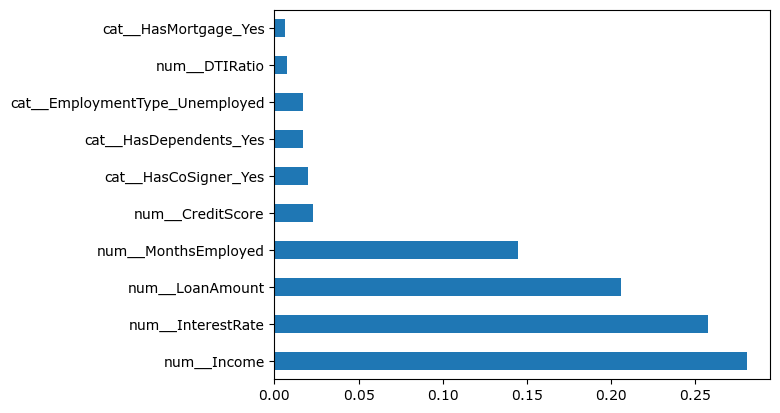

In [104]:
feature_importance.head(10).plot(kind="barh")

Income, InterestRate, LoanAmount, and CreditScore are the most influential features in predicting loan default, while demographic and employment-related variables play a secondary role.


## Model Comparison

In [105]:
import pandas as pd
from sklearn.metrics import roc_auc_score, average_precision_score

models = {
    "Logistic Regression": logreg_pipeline,
    "Random Forest": rf_pipeline,
    "Gradient Boosting": gb_pipeline
}

rows = []
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    rows.append({
        "Model": name,
        "ROC-AUC": roc_auc_score(y_test, y_proba),
        "PR-AUC": average_precision_score(y_test, y_proba)
    })

model_comparison = pd.DataFrame(rows).sort_values("PR-AUC", ascending=False)
model_comparison

,Model,ROC-AUC,PR-AUC
2,Gradient Boosting,0.707331,0.270918
0,Logistic Regression,0.700323,0.245571
1,Random Forest,0.681495,0.243850


In [106]:
model_comparison.sort_values(by="ROC-AUC", ascending=False)

,Model,ROC-AUC,PR-AUC
2,Gradient Boosting,0.707331,0.270918
0,Logistic Regression,0.700323,0.245571
1,Random Forest,0.681495,0.243850


## Final Model Selection

Among the evaluated models, Gradient Boosting achieved the best overall performance, with the highest ROC-AUC and PR-AUC scores. While Logistic Regression showed higher recall for the default class, Gradient Boosting provided a better balance between precision and recall, making it more suitable for practical risk assessment.

A decision threshold of 0.2 was selected to balance default detection and false positive rates. This configuration allows the model to capture a reasonable proportion of high-risk borrowers while maintaining acceptable overall accuracy.

## Business Insight

The results indicate that financial variables such as income, interest rate, loan amount, and credit score are the primary drivers of loan default risk. Demographic and employment-related features contribute less but still provide incremental value.

The final Gradient Boosting model can be used as a decision-support tool to flag high-risk loan applicants, enabling lenders to take preventive actions such as stricter approval criteria or adjusted interest rates.